<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diddier Cofré</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudantía
## 1.1 Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib


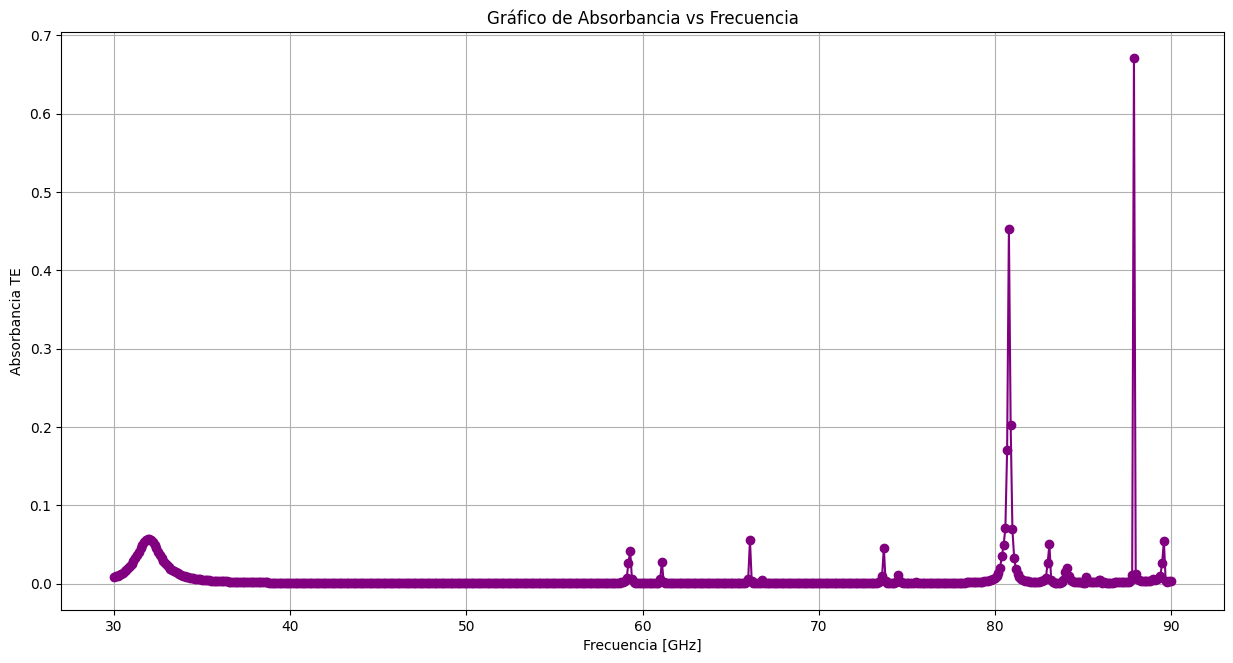

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("/AbsorbanceTE_0-0.csv")

# Eliminar comillas dobles del nombre de columnas si es necesario
df.columns = df.columns.str.replace('"', '')

# Extraer las columnas necesarias
frecuencia = df["Freq [GHz]"]
absorbancia = df["AbsorbanceTE []"]

# Graficar
plt.figure(figsize=(15,7.5))
plt.plot(frecuencia, absorbancia, marker='o', linestyle='-', color='purple')
plt.xlabel("Frecuencia [GHz]")
plt.ylabel("Absorbancia TE")
plt.title("Gráfico de Absorbancia vs Frecuencia")
plt.grid(True)
plt.show()


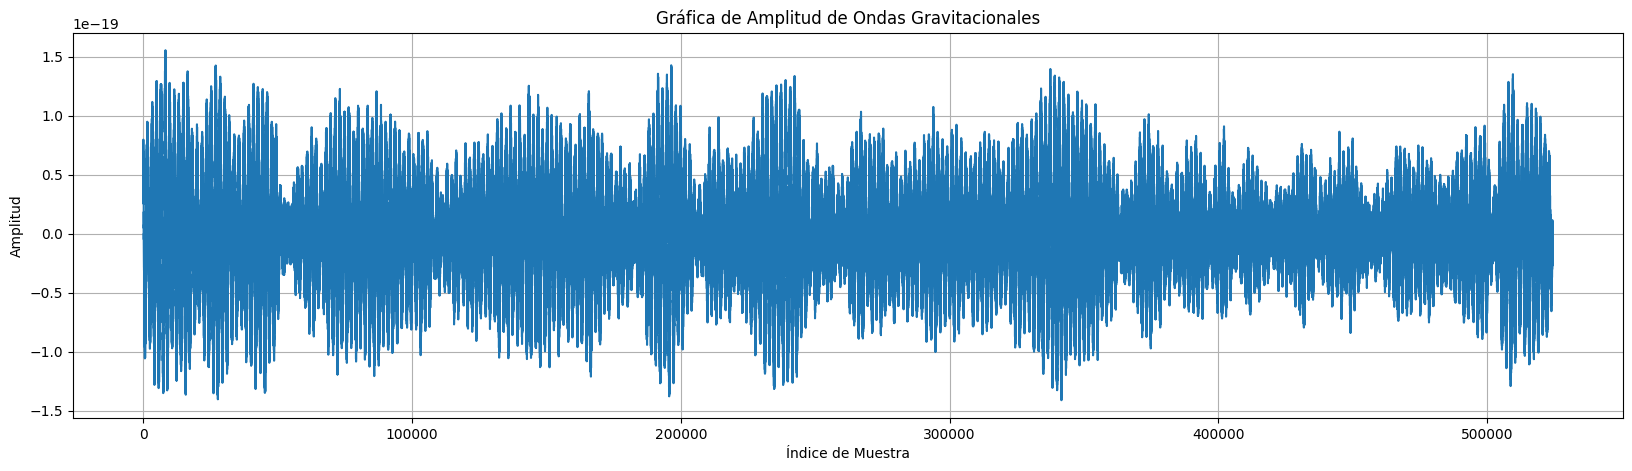

In [3]:
import gzip # Llamo a la libreria gzip, libreria para descomprimir archivos.gz
import shutil # Llamo a la libreria shutil

ruta_archivo_comprimido = '/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz' #Ingreso la ruta de el archivo que quiero descomprimir

ruta_archivo_descomprimido = '/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt' #Ingreso la ruta donde quiero descomprimirlo, el nombre y el formato

with gzip.open(ruta_archivo_comprimido, 'rb') as archivo_comprimido:   #Abre el comprimido
    with open(ruta_archivo_descomprimido, 'wb') as archivo_descomprimido:  #Se guardan los datos descomprimidos
        shutil.copyfileobj(archivo_comprimido, archivo_descomprimido) # Esto copia todo el contenido del archivo comprimido hacia el descomprimido

# Lee el contenido del archivo y guarda los datos en una lista
with open("/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt", "r") as file:
    lines = file.readlines()  # Lee todas las líneas del archivo
    data = [float(line.strip()) for line in lines[4:]]  # Ignora las primeras 4 líneas y convierte el resto en números flotantes (Ignoramos esas 4 primeras lineas ya que son información que no nos sirve)

# Graficamos
plt.figure(figsize=(20,5))
plt.plot(data)
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.title('Gráfica de Amplitud de Ondas Gravitacionales')
plt.grid(True) #Recuadros dentro del grafico

In [ ]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

fatal: destination path 'EIE_401_MULTIMEDIA' already exists and is not an empty directory.


## 1.2 Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos muestra una onda senoidal.



## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizarás para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


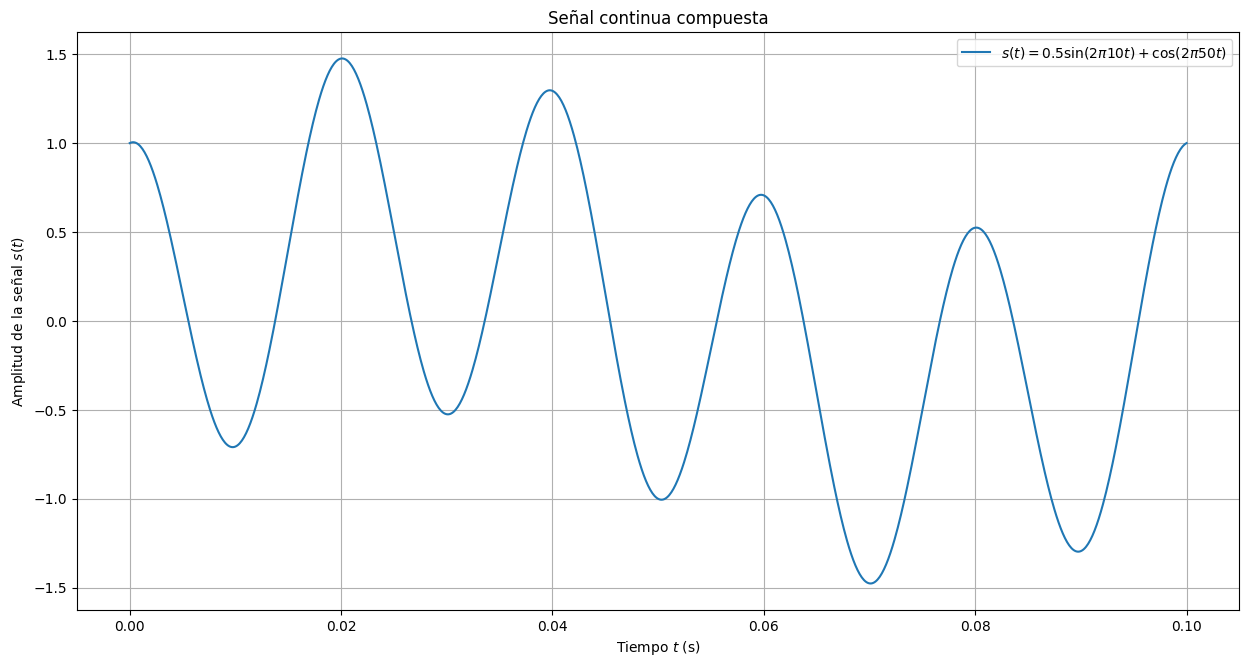

In [ ]:
import numpy as np

# Definimos el tiempo
t = np.linspace(0, 0.1, 1000)  # 0.1 segundo, 1000 muestras

# Frecuencias
f1 = 10   # Hz
f2 = 50  # Hz

# Señal: suma de seno y coseno
s = 0.5 * np.sin(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Graficamos
plt.figure(figsize=(15,7.5))
plt.plot(t, s, label=r'$s(t) = 0.5\sin(2\pi10t) + \cos(2\pi50t)$')
plt.title('Señal continua compuesta')
plt.xlabel('Tiempo $t$ (s)')
plt.ylabel('Amplitud de la señal $s(t)$')
plt.grid(True)
plt.legend()


$$
s(t) = 0.5 \cdot \sin(2\pi \cdot 10t) + \cos(2\pi \cdot 50t)
$$


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

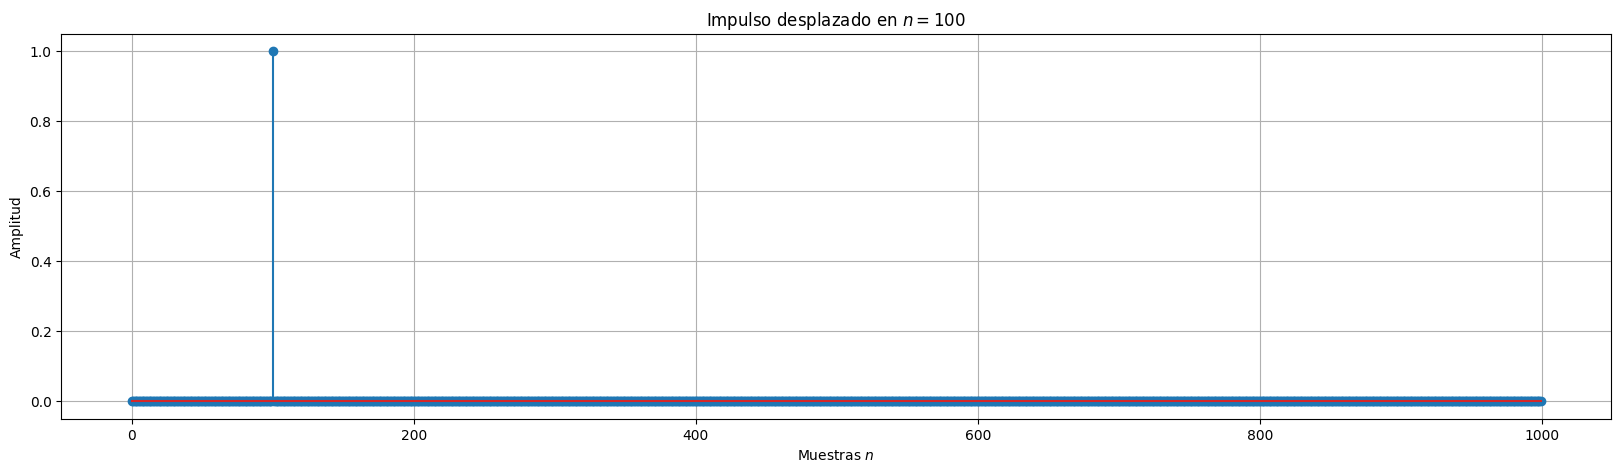

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Crear vector de ceros
n = np.arange(0, 1000)
delta = np.zeros_like(n)

# Posición del impulso (por ejemplo, en n=100)
impulso_pos = 100
delta[impulso_pos] = 1

# Graficamos
plt.figure(figsize=(20,5))
plt.stem(n, delta)
plt.title('Impulso desplazado en $n=100$')
plt.xlabel('Muestras $n$')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

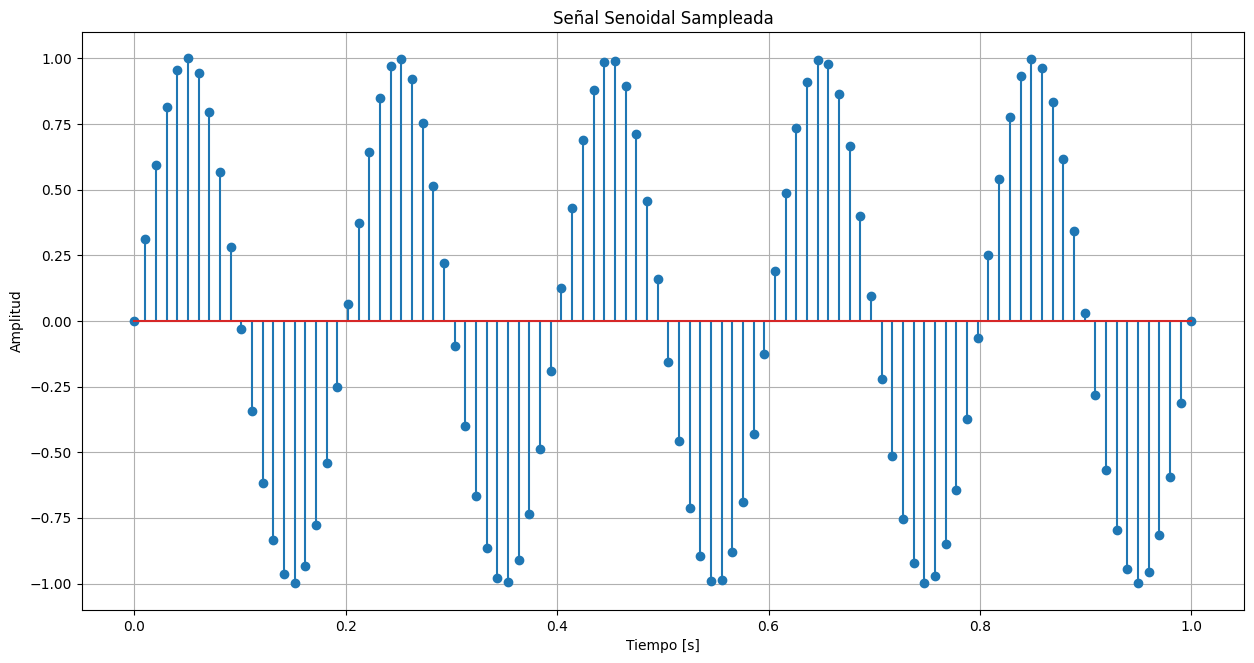

In [5]:
# Definimos los parámetros de la señal
fs = 100  # Frecuencia de sampleo
t = np.linspace(0, 1, fs) # Tiempo
f = 5  # Frecuencia de la señal (en Hz)

#Definimos la señal senoidal
senoidal = np.sin(2 * np.pi * f * t)

# Gráfica con stem
plt.figure(figsize=(15,7.5))
plt.stem(t, senoidal)
plt.title('Señal Senoidal Sampleada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

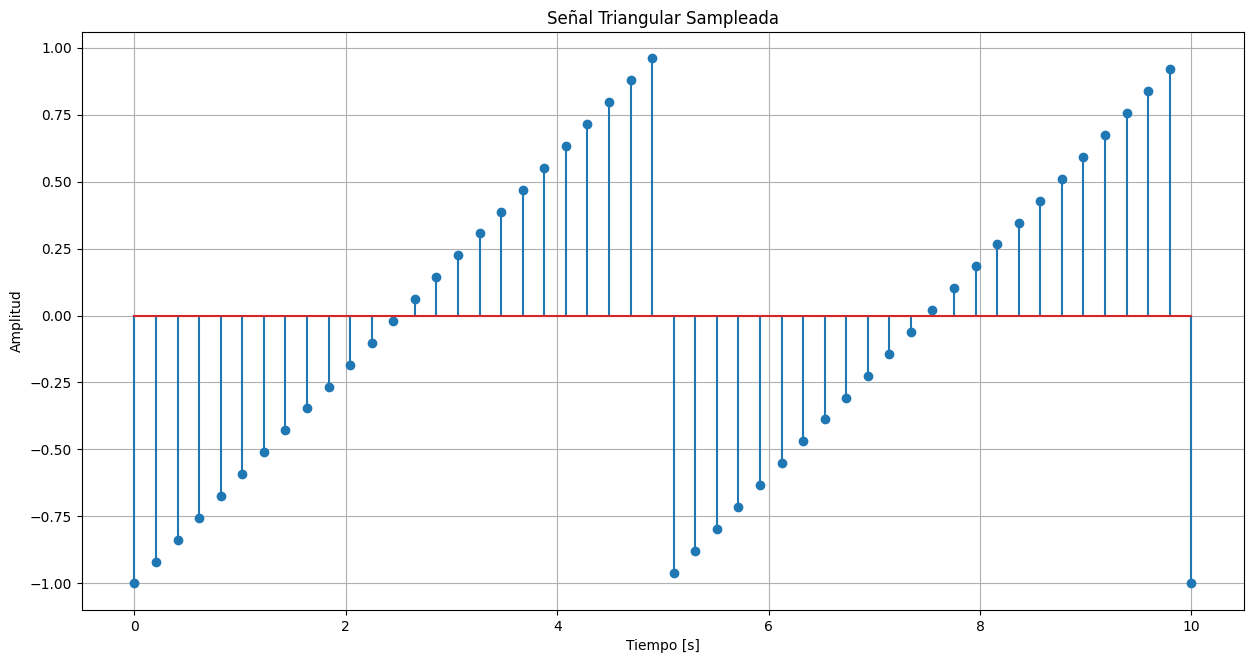

In [6]:
# Definir parámetros
frecuencia = 10  # Frecuencia de la señal
duracion = 10    # Duración en segundos
muestras = 50 # Número de muestras

# Crear el tiempo y la señal triangular
t = np.linspace(0, duracion, muestras)
señal_triangular = 2 * (t * frecuencia % 1) - 1

# Graficamos con stem
plt.figure(figsize=(15,7.5))
plt.stem(t, señal_triangular)
plt.title('Señal Triangular Sampleada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

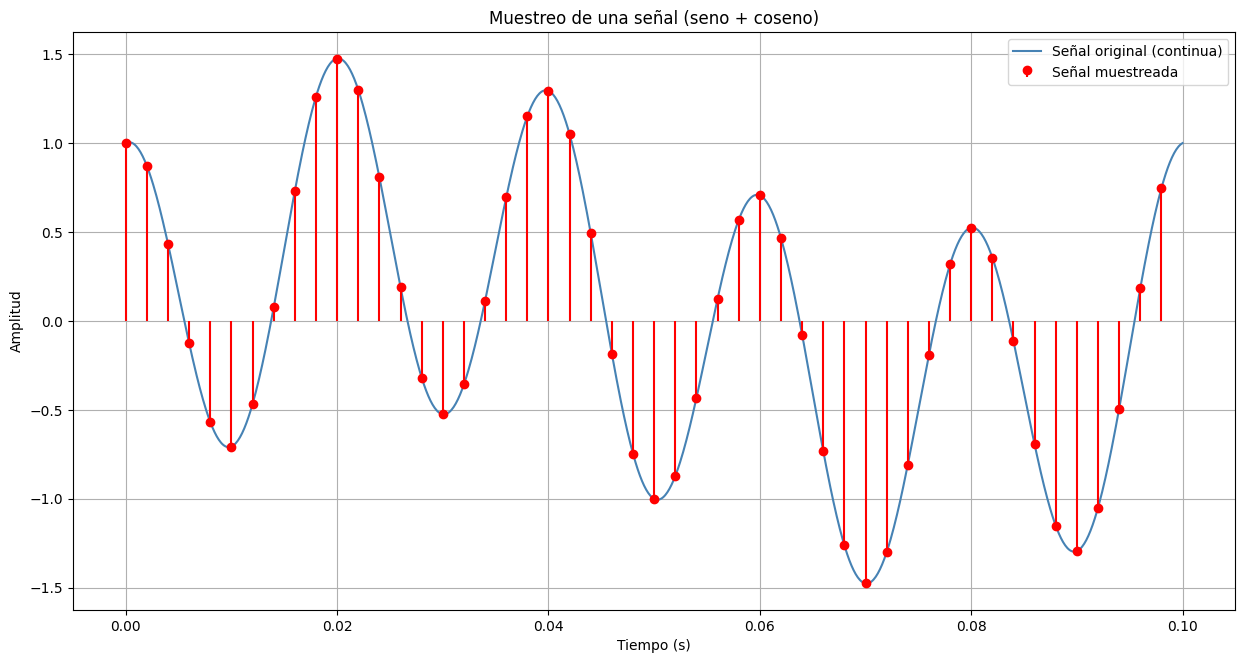

In [7]:
# Definimos los parámetros
duracion = 0.1  # Duración en segundos
f1 = 10         # Hz
f2 = 50         # Hz
frecuencia_muestreo = 500  # Hz (Suficientemente alta para ver la forma bien)

# Señal continua
t = np.linspace(0, duracion, 1000)  # 0.1 segundo, 1000 muestras
s = 0.5 * np.sin(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Señal muestreada
t_muestreado = np.arange(0, duracion, 1 / frecuencia_muestreo)
s_muestreada = 0.5 * np.sin(2 * np.pi * f1 * t_muestreado) + np.cos(2 * np.pi * f2 * t_muestreado)

# Graficamos
plt.figure(figsize=(15, 7.5))
plt.plot(t, s, label="Señal original (continua)", color="steelblue")
plt.stem(t_muestreado, s_muestreada, linefmt='r-', markerfmt='ro', basefmt=' ', label="Señal muestreada")
plt.title("Muestreo de una señal (seno + coseno)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

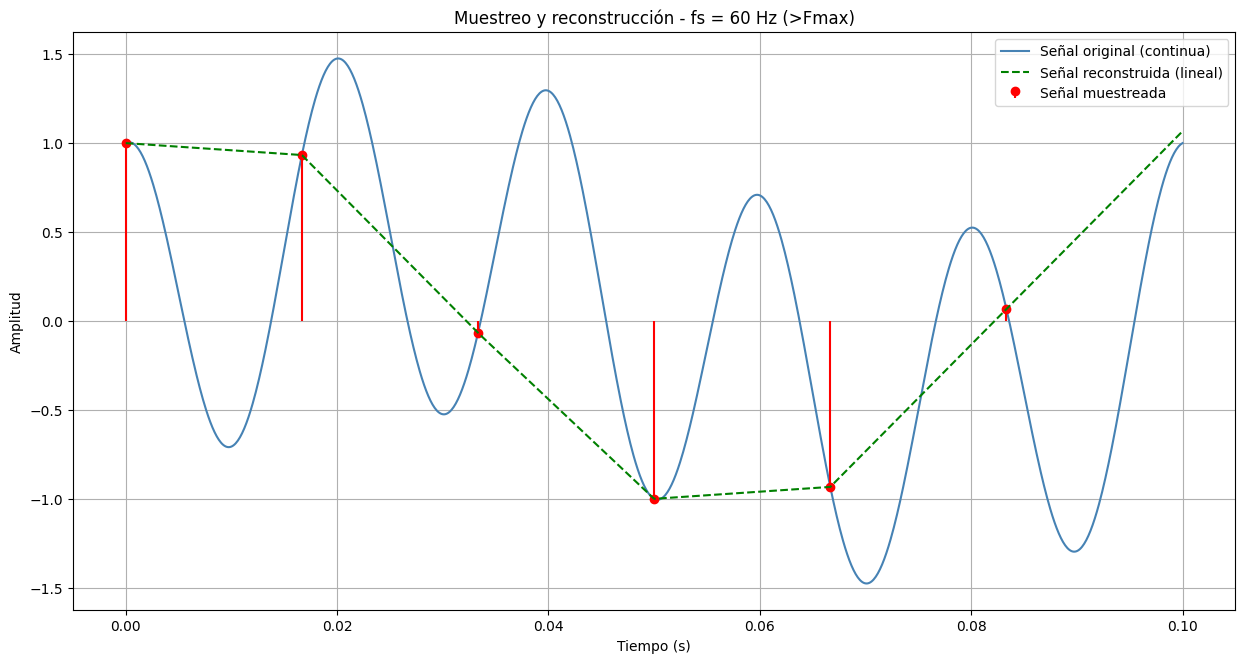

In [8]:
from scipy.interpolate import interp1d #Importamos la función "interp1d" de la biblioteca SciPy

# Definimos los parámetros
duracion = 0.1   # Duración en segundos
f1 = 10          # Hz
f2 = 50          # Hz (Que vendría a ser Fmax (La frecuencia mas alta de la señal))
frecuencia_muestreo = 60  # Hz (fs > Fmax)

# Señal continua (referencia)
t_continuo = np.linspace(0, duracion, 1000)
t = np.linspace(0, 0.1, 1000)  # 0.1 segundo, 1000 muestras
s = 0.5 * np.sin(2 * np.pi * f1 * t_continuo) + np.cos(2 * np.pi * f2 * t_continuo)

# Muestreo
t_muestreado = np.arange(0, duracion, 1 / frecuencia_muestreo)
s_muestreada = 0.5 * np.sin(2 * np.pi * f1 * t_muestreado) + np.cos(2 * np.pi * f2 * t_muestreado)

# Reconstrucción (interpolación lineal)
interp_lineal = interp1d(t_muestreado, s_muestreada, kind='linear', fill_value="extrapolate")
s_reconstruida = interp_lineal(t_continuo)

# Graficar
plt.figure(figsize=(15, 7.5))
plt.plot(t_continuo, s, label="Señal original (continua)", color="steelblue")
plt.stem(t_muestreado, s_muestreada, linefmt='r-', markerfmt='ro', basefmt=' ', label="Señal muestreada")
plt.plot(t_continuo, s_reconstruida, 'g--', label="Señal reconstruida (lineal)")
plt.title("Muestreo y reconstrucción - fs = 60 Hz (>Fmax)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


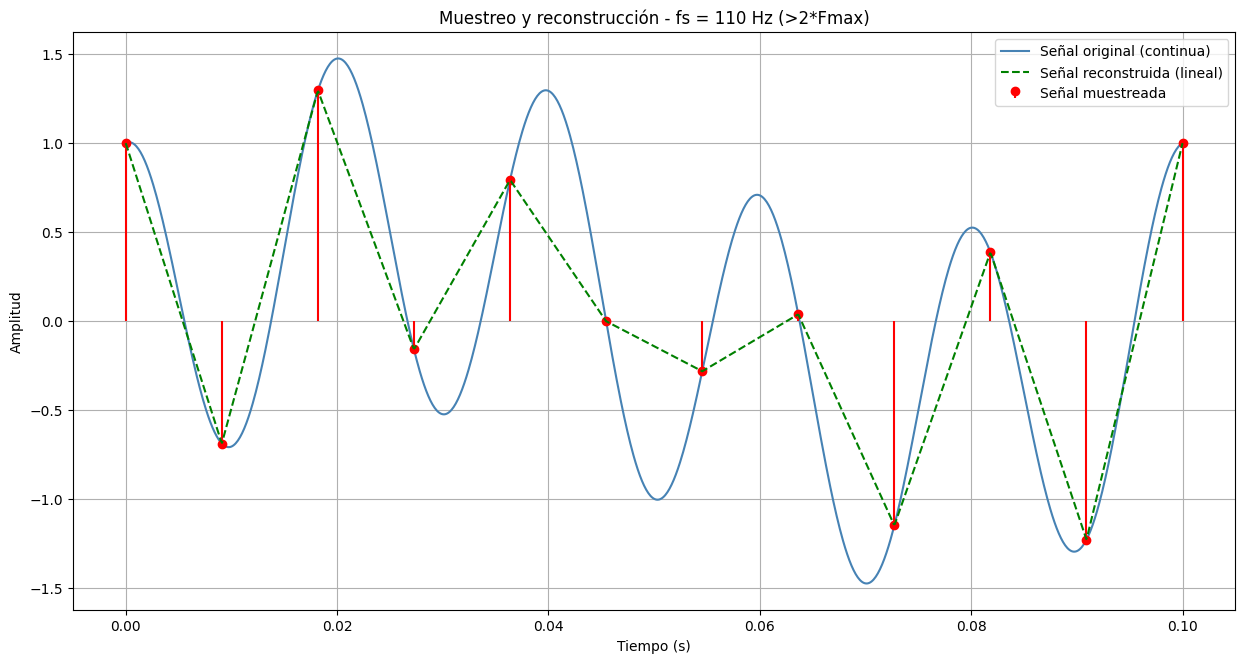

In [9]:
from scipy.interpolate import interp1d #Importamos la función "interp1d" de la biblioteca SciPy

# Definimos los parametros
duracion = 0.1   # Duración en segundos
f1 = 10          # Hz
f2 = 50          # Hz (Que vendría a ser Fmax (La frecuencia mas alta de la señal))
frecuencia_muestreo = 110  # Hz (fs > 2*Fmax)

# Señal continua (referencia)
t_continuo = np.linspace(0, duracion, 1000)
t = np.linspace(0, 0.1, 1000)  # 0.1 segundo, 1000 muestras
s = 0.5 * np.sin(2 * np.pi * f1 * t_continuo) + np.cos(2 * np.pi * f2 * t_continuo)

# Muestreo
t_muestreado = np.arange(0, duracion, 1 / frecuencia_muestreo)
s_muestreada = 0.5 * np.sin(2 * np.pi * f1 * t_muestreado) + np.cos(2 * np.pi * f2 * t_muestreado)

# Reconstrucción (interpolación lineal)
interp_lineal = interp1d(t_muestreado, s_muestreada, kind='linear', fill_value="extrapolate")
s_reconstruida = interp_lineal(t_continuo)

# Graficar
plt.figure(figsize=(15, 7.5))
plt.plot(t_continuo, s, label="Señal original (continua)", color="steelblue")
plt.stem(t_muestreado, s_muestreada, linefmt='r-', markerfmt='ro', basefmt=' ', label="Señal muestreada")
plt.plot(t_continuo, s_reconstruida, 'g--', label="Señal reconstruida (lineal)")
plt.title("Muestreo y reconstrucción - fs = 110 Hz (>2*Fmax)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


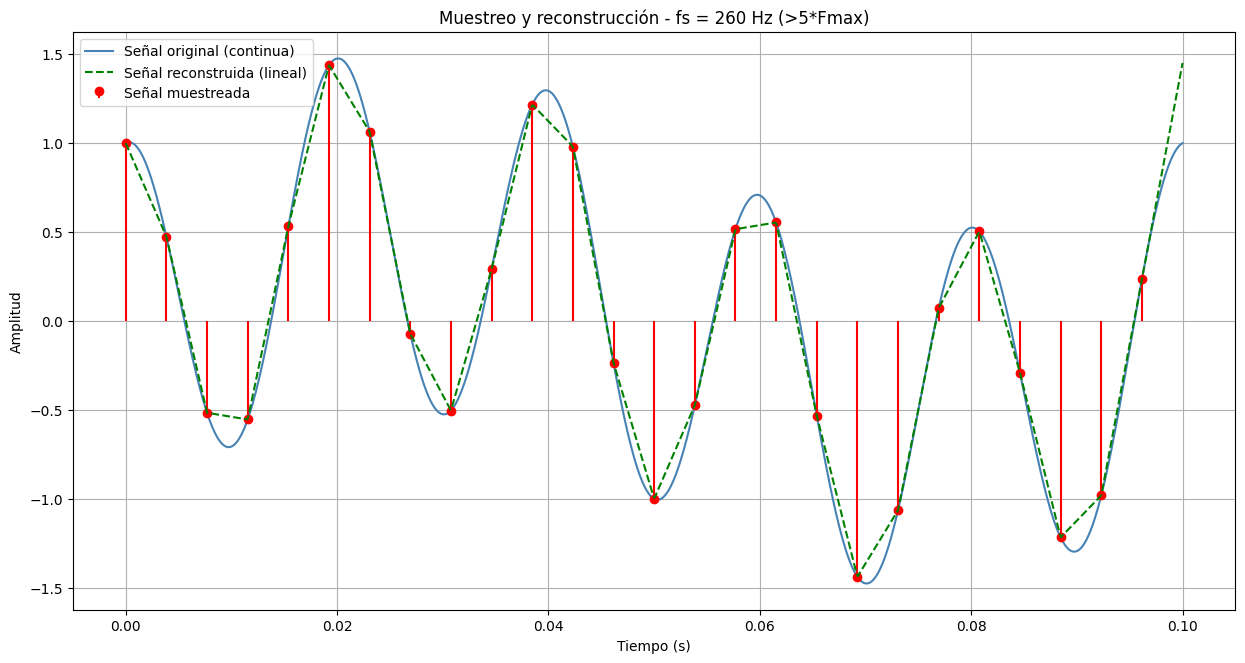

In [10]:
from scipy.interpolate import interp1d #Importamos la función "interp1d" de la biblioteca SciPy

# Definimos los parametros
duracion = 0.1   # Duración en segundos
f1 = 10          # Hz
f2 = 50          # Hz (Que vendría a ser Fmax (La frecuencia mas alta de la señal))
frecuencia_muestreo = 260  # Hz (fs > 5*Fmax)

# Señal continua (referencia)
t_continuo = np.linspace(0, duracion, 1000)
t = np.linspace(0, 0.1, 1000)  # 0.1 segundo, 1000 muestras
s = 0.5 * np.sin(2 * np.pi * f1 * t_continuo) + np.cos(2 * np.pi * f2 * t_continuo)

# Muestreo
t_muestreado = np.arange(0, duracion, 1 / frecuencia_muestreo)
s_muestreada = 0.5 * np.sin(2 * np.pi * f1 * t_muestreado) + np.cos(2 * np.pi * f2 * t_muestreado)

# Reconstrucción (interpolación lineal)
interp_lineal = interp1d(t_muestreado, s_muestreada, kind='linear', fill_value="extrapolate")
s_reconstruida = interp_lineal(t_continuo)

# Graficar
plt.figure(figsize=(15, 7.5))
plt.plot(t_continuo, s, label="Señal original (continua)", color="steelblue")
plt.stem(t_muestreado, s_muestreada, linefmt='r-', markerfmt='ro', basefmt=' ', label="Señal muestreada")
plt.plot(t_continuo, s_reconstruida, 'g--', label="Señal reconstruida (lineal)")
plt.title("Muestreo y reconstrucción - fs = 260 Hz (>5*Fmax)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


## 4. Análisis en el dominio de la frecuencia


### 4.1 Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


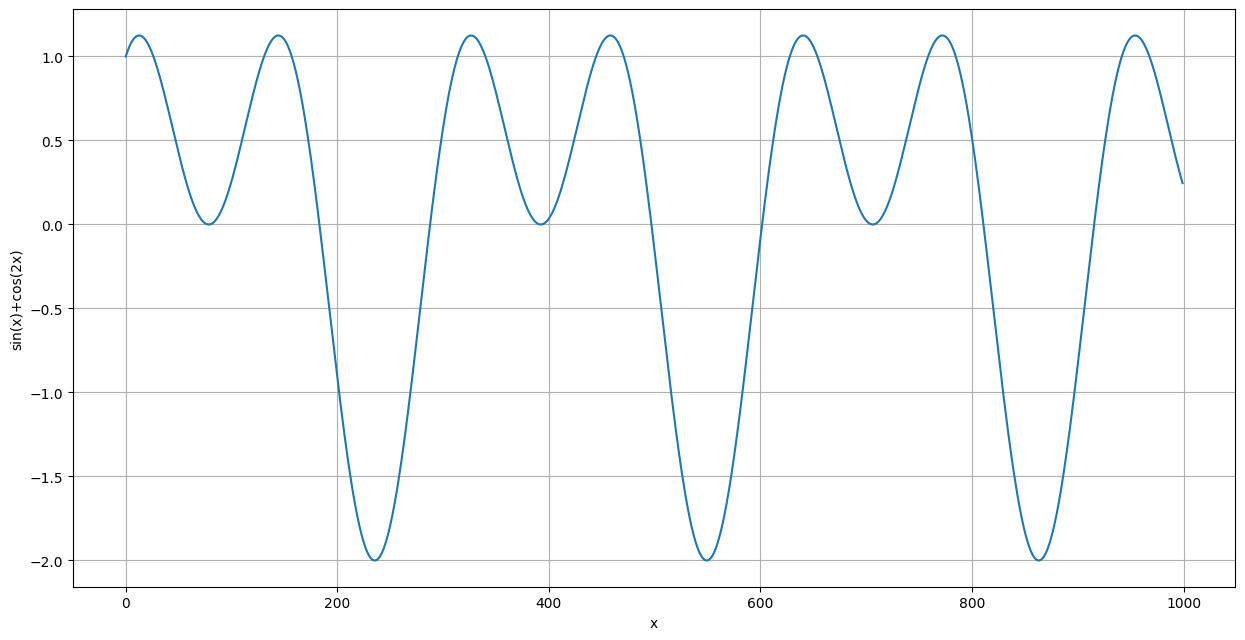

In [11]:
# Definimos la señal
x = np.linspace(0,20,1000)
señal = np.sin(x) + np.cos(2*x)

# Graficamos
plt.figure(figsize=(15, 7.5))
plt.plot(señal)
plt.xlabel("x")
plt.ylabel("sin(x)+cos(2x)")
plt.grid(True)
plt.show()

### 4.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

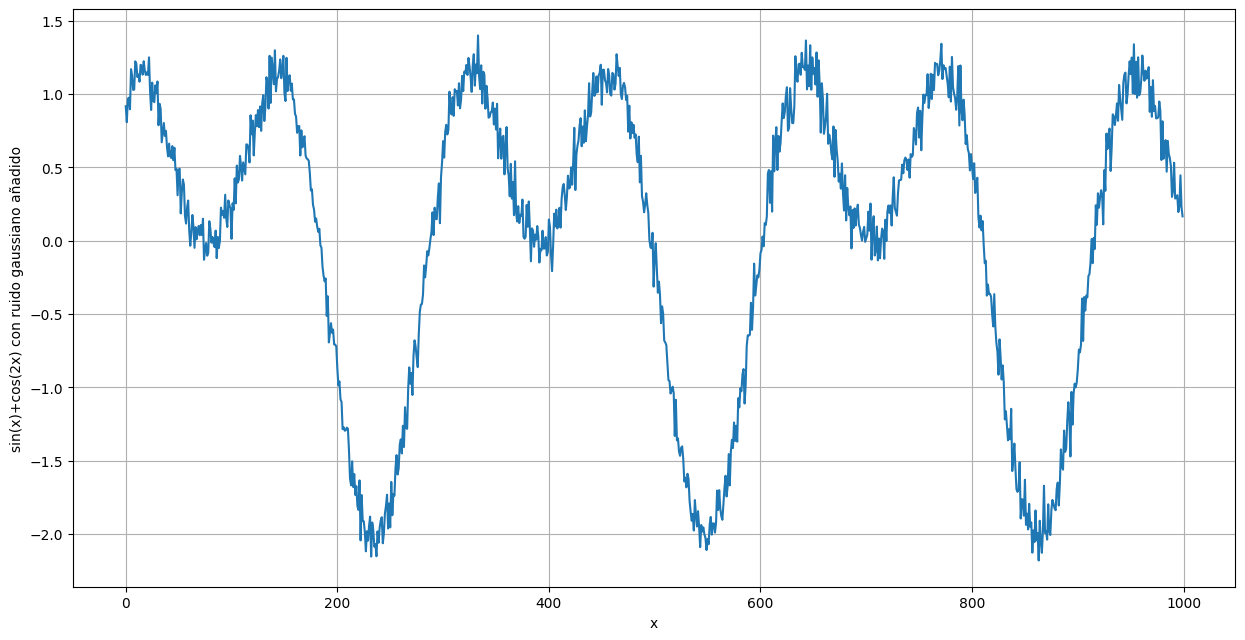

In [12]:
# Definimos la señal
x = np.linspace(0,20,1000)
señal = np.sin(x) + np.cos(2*x)

# Añadimos ruido gaussiano
media = 0 # Media del ruido
desviacion = 0.1 # Desviación estándar del ruido
muestras = 1000 # Número de muestras
ruido_gaussiano = np.random.normal(media, desviacion, muestras) # Creamos el ruido gaussiano
señal_con_ruido = señal + ruido_gaussiano # Añadimos el ruido gaussiano

# Graficamos
plt.figure(figsize=(15, 7.5))
plt.plot(señal_con_ruido)
plt.xlabel("x")
plt.ylabel("sin(x)+cos(2x) con ruido gaussiano añadido")
plt.grid(True)
plt.show()

### 4.3 Obtenga la transformada de Fourier para las dos señales que generaste previamente


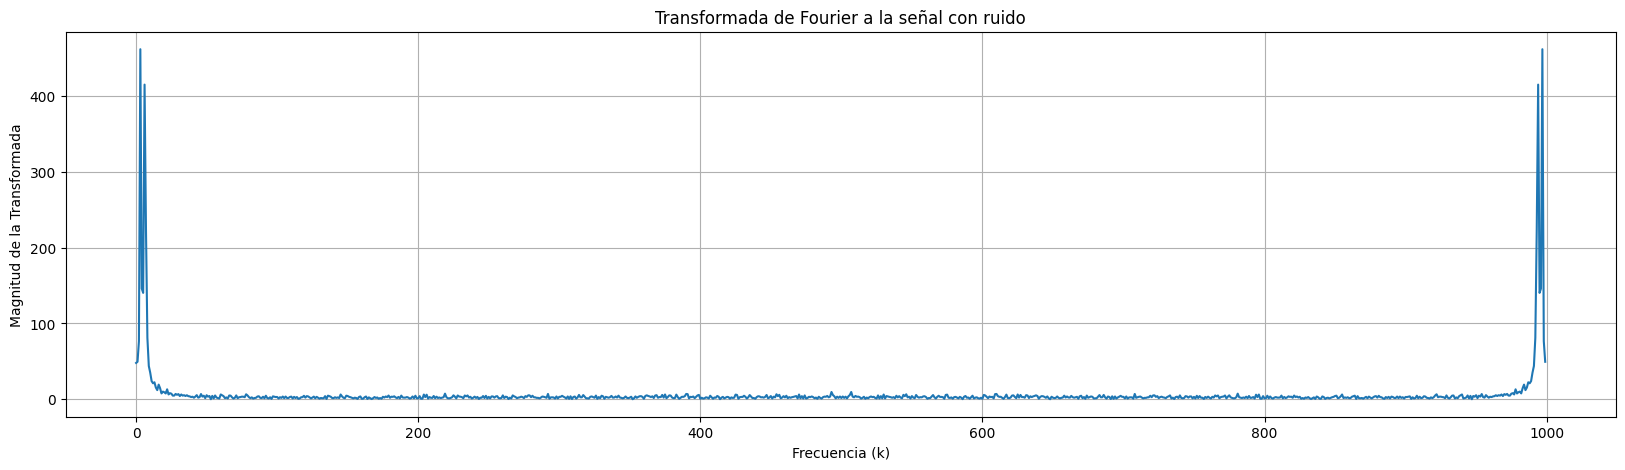

In [14]:
# Implementación de la Transformada de Fourier discreta (DFT) para la señal con ruido
N = len(señal_con_ruido)
transformada = []

for k in range(N):  # Iteramos sobre las frecuencias
    suma = 0
    for n in range(N):  # Iteramos sobre los puntos de la señal
        suma += señal_con_ruido[n] * np.exp(-2j * np.pi * k * n / N)
    transformada.append(suma)

# Magnitud de la transformada de Fourier para graficar
magnitud_transformada = np.abs(transformada)

# Graficamos la transformada de Fourier de la señal
plt.figure(figsize=(20, 5))
plt.plot(magnitud_transformada)
plt.xlabel("Frecuencia (k)")
plt.ylabel("Magnitud de la Transformada")
plt.title('Transformada de Fourier a la señal con ruido')
plt.grid(True)
plt.show()


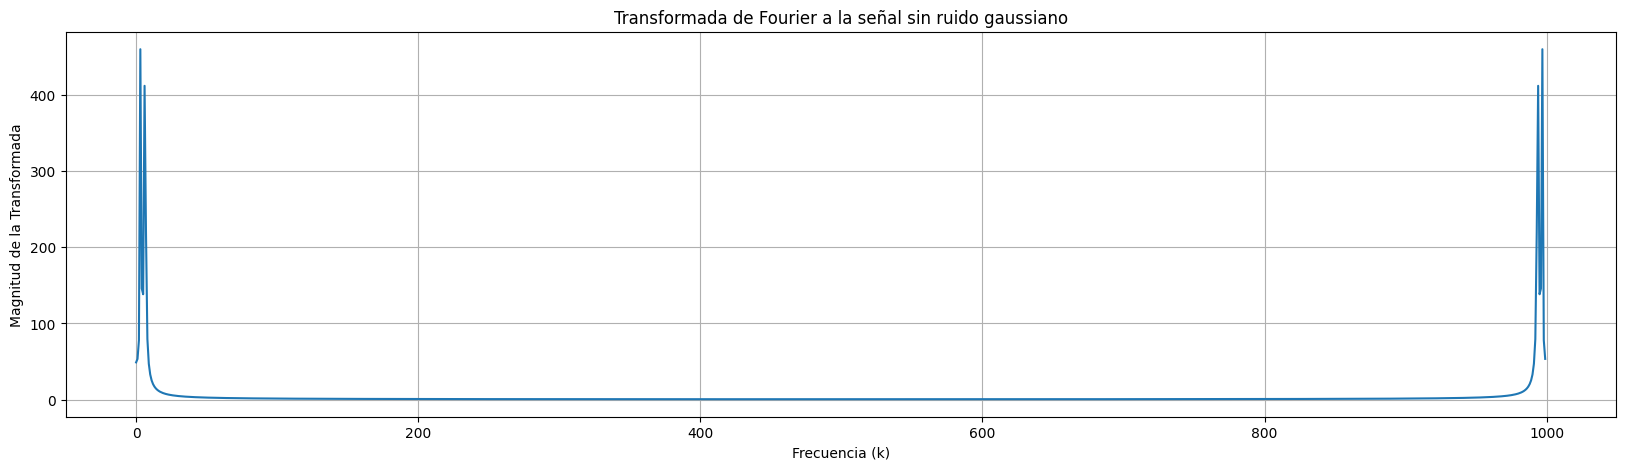

In [15]:
# Implementación de la Transformada de Fourier discreta (DFT) para la señal sin ruido
N = len(señal)
transformada = []

for k in range(N):  # Iteramos sobre las frecuencias
    suma = 0
    for n in range(N):  # Iteramos sobre los puntos de la señal
        suma += señal[n] * np.exp(-2j * np.pi * k * n / N)
    transformada.append(suma)

# Magnitud de la transformada de Fourier para graficar
magnitud_transformada = np.abs(transformada)

# Graficamos la transformada de Fourier de la señal
plt.figure(figsize=(20, 5))
plt.plot(magnitud_transformada)
plt.xlabel("Frecuencia (k)")
plt.ylabel("Magnitud de la Transformada")
plt.title('Transformada de Fourier a la señal sin ruido gaussiano')
plt.grid(True)
plt.show()


### 4.4 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

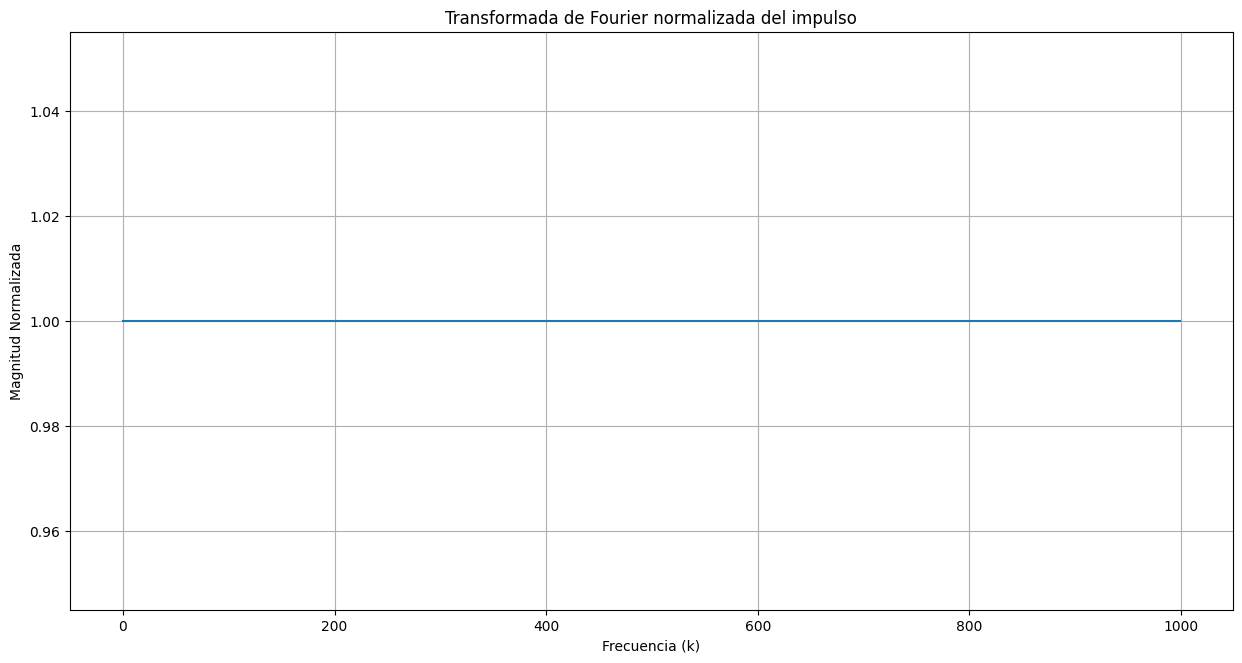

In [16]:
# Implementación de la DFT del impulso
N = len(delta)  # Número de muestras
dft_delta = []

for k in range(N):
    suma = 0
    for n in range(N):
        suma += delta[n] * np.exp(-2j * np.pi * k * n / N)
    dft_delta.append(suma)

# Magnitud de la DFT
magnitud_dft = np.abs(dft_delta)

# Normalización de la DFT
magnitud_dft_normalizada = magnitud_dft / np.max(magnitud_dft)

# Graficamos la DFT normalizada
plt.figure(figsize=(15, 7.5))
plt.plot(magnitud_dft_normalizada)
plt.title('Transformada de Fourier normalizada del impulso')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Magnitud Normalizada')
plt.grid(True)
plt.show()


**OBSERVACIÓN: En esta ocasión la normalización no tiene mucho sentido ya que no afecta el resultado, tanto de la normalización de la señal impulso, como la normalización de su DFT.**

### 4.5 Encuentra la transformada inversa de Fourier
_Solo para una señal de las dos que generaste inicialmente_.

En este caso puede usar una librería.

Explica en detalle que hace la librería y el resultado que arroja.

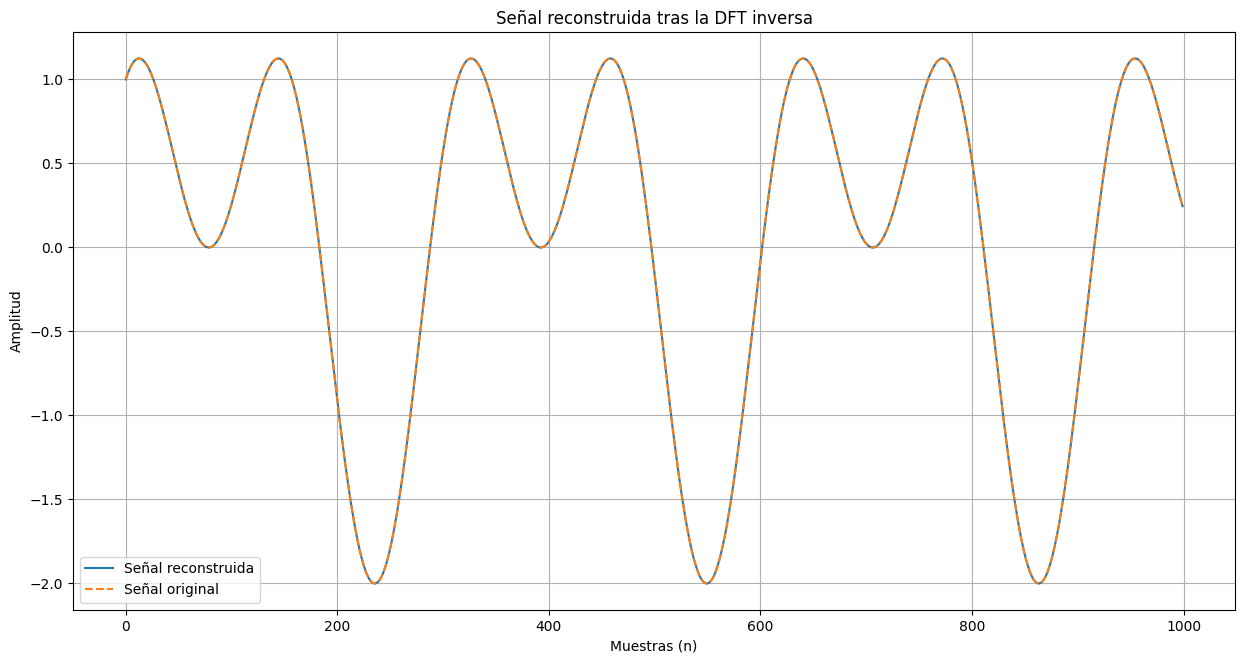

In [17]:
# Implementación de la Transformada de Fourier Inversa (A la señal sin ruido)
señal_reconstruida = []

for n in range(N):  # Iteramos sobre las muestras en el tiempo
    suma = 0
    for k in range(N):  # Iteramos sobre las frecuencias
        suma += transformada[k] * np.exp(2j * np.pi * k * n / N)
    señal_reconstruida.append(suma / N)  # Se divide por N para normalizar

# Convertimos la lista a un array de numpy para facilitar la manipulación
señal_reconstruida = np.array(señal_reconstruida).real  # Tomamos solo la parte real

# Graficamos la señal reconstruida
plt.figure(figsize=(15, 7.5))
plt.plot(señal_reconstruida, label="Señal reconstruida")
plt.plot(señal, linestyle="dashed", label="Señal original")
plt.xlabel("Muestras (n)")
plt.ylabel("Amplitud")
plt.title("Señal reconstruida tras la DFT inversa")
plt.legend()
plt.grid(True)
plt.show()


EXPLICACIÓN: Para implementar la IDFT, no se utilizó librerias, si no que se implementó por medio de un metodo iterativo. Este metodo consistió primero en generar una lista vacia llamada "señal_reconstruida" donde se irían almacenando los valores reconstruidos de la señal. Luego se iteró sobre las "n" muestras de la señal reconstruida, es decir que para cada instante "n" se sumaron todas las contribuciones de las frecuencias "k" presentes en la DFT. Después se recorrió cada frecuencia "k" de la DFT aplicando la fórmula de la IDFT: $$suma += transformada[k] * exp(2j * \pi * k * n / N)$$
Aquí estamos reconstruyendo la señal sumando todas las contribuciones de las frecuencias "k", multiplicadas por su exponencial compleja. (Proceso inverso a lo que se hizo para obtener la transformada de Fourier de la señal). Por último, después de acumular todas las "n" contribuciones, dividimos por "N", lo cual es crucial para escalar la señal al dominio del tiempo, y además tomamos la parte real de la señal reconstruida ya que las componentes imaginarias no tienen real significado en este dominio y son errores numéricos. Y asi se obtuvo la señal nuevamente en el dominio del tiempo, y como se ve en el grafico, la reconstrucción fue muy efectiva.


# 5 Explica tus hallazgos (explicar basado en la teoría)
- Explica que comprobaste con relación al sampleo de señales.
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

1) En relación al sampleo de señales, pude comprobar que efectivamente se cumple el teorema de muestreo de Nyquist-Shannon, que establece que para poder reconstruir una señal muestrada de manera efectiva, es necesario que esa señal sea muestreada a una frecuencia al menos dos veces mayor a su frecuencia mas alta. En estos ejemplos realizados, pudimos ver como al muestrear una señal a una frecuencia menor del doble de su frecuencia mas alta, la reconstrucción de esta señal fue inprecisa. Luego se muestreó a frecuencias mayores al doble y al quintuple de la frecuencia mas alta de la señal muestreada, y el resultados fue mucho mejor, especialmente cuando se muestreó a una frecuencia 5 veces mayor a la frecuencia mas alta de la señal muestreada. Esto es una información muy importante en cuanto al muestreo de señales, para poder conseguir las transmisiones de datos esperadas.

2) El efecto del ruido en la ondas, es el de la distorsión de la señal y la perdida de información, ya que se ven afectados los datos que se pueden obtener al muestrear la señal y al cuantizarla. El nivel de distorsión va a estar por supuesto directamente relacionado con el nivel del ruido, y siempre lo esperado va a ser poder reconstruir la señal de una manera lo suficientemente fidedigna como para que pueda ser interpretada correctamente, entonces el desafio va a ser el poder reducir las perdidas de información por el ruido, para transmitir los mensajes correctamente.

3) El resultado de la transformada de Fourier en señales, representa las frecuencias que componen la señal. En los casos realizados en este trabajo, en la sección 4.3 podemos ver que la señal cuenta con dos frecuencias que la componen, una cercana a los 50 Hz y otra cercana a los 950 Hz, y además en el caso en que se le añadió ruido gaussiano a la señal, en el grafico de la transformada de Fourier podemos apreciar ese ruido. En la sección 4.4 podemos ver la transformada de Fourier de una señal impulso, y el gráfico nos muestra como esta señal está compuesta por todo el espectro de frecuencias en igual magnitud, lo cual es correcto por definición.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html